In [67]:
# Importing Libraries
import pandas as pd
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score

In [2]:
#reading csv file
data=pd.read_csv('bank-full.csv')

In [3]:
data.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,Target
0,58,management,married,tertiary,no,2143,yes,no,unknown,5,may,261,1,-1,0,unknown,no
1,44,technician,single,secondary,no,29,yes,no,unknown,5,may,151,1,-1,0,unknown,no
2,33,entrepreneur,married,secondary,no,2,yes,yes,unknown,5,may,76,1,-1,0,unknown,no
3,47,blue-collar,married,unknown,no,1506,yes,no,unknown,5,may,92,1,-1,0,unknown,no
4,33,unknown,single,unknown,no,1,no,no,unknown,5,may,198,1,-1,0,unknown,no


In [4]:
data.shape

(45211, 17)

## EDA

In [5]:
data.info()   # no missing values

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45211 entries, 0 to 45210
Data columns (total 17 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   age        45211 non-null  int64 
 1   job        45211 non-null  object
 2   marital    45211 non-null  object
 3   education  45211 non-null  object
 4   default    45211 non-null  object
 5   balance    45211 non-null  int64 
 6   housing    45211 non-null  object
 7   loan       45211 non-null  object
 8   contact    45211 non-null  object
 9   day        45211 non-null  int64 
 10  month      45211 non-null  object
 11  duration   45211 non-null  int64 
 12  campaign   45211 non-null  int64 
 13  pdays      45211 non-null  int64 
 14  previous   45211 non-null  int64 
 15  poutcome   45211 non-null  object
 16  Target     45211 non-null  object
dtypes: int64(7), object(10)
memory usage: 5.9+ MB


In [7]:
data[data.duplicated()] #no duplicates

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,Target


In [12]:
data.describe()

,age,balance,day,duration,campaign,pdays,previous
count,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000
mean,40.936210,1362.272058,15.806419,258.163080,2.763841,40.197828,0.580323
std,10.618762,3044.765829,8.322476,257.527812,3.098021,100.128746,2.303441
min,18.000000,-8019.000000,1.000000,0.000000,1.000000,-1.000000,0.000000
25%,33.000000,72.000000,8.000000,103.000000,1.000000,-1.000000,0.000000
50%,39.000000,448.000000,16.000000,180.000000,2.000000,-1.000000,0.000000
75%,48.000000,1428.000000,21.000000,319.000000,3.000000,-1.000000,0.000000
max,95.000000,102127.000000,31.000000,4918.000000,63.000000,871.000000,275.000000


In [8]:
# one hot encoding on features
data1=pd.get_dummies(data,columns=['job','marital','education','contact','month','poutcome'])
data1.head()

,age,default,balance,housing,loan,day,duration,campaign,pdays,previous,...,month_jun,month_mar,month_may,month_nov,month_oct,month_sep,poutcome_failure,poutcome_other,poutcome_success,poutcome_unknown
0,58,no,2143,yes,no,5,261,1,-1,0,...,0,0,1,0,0,0,0,0,0,1
1,44,no,29,yes,no,5,151,1,-1,0,...,0,0,1,0,0,0,0,0,0,1
2,33,no,2,yes,yes,5,76,1,-1,0,...,0,0,1,0,0,0,0,0,0,1
3,47,no,1506,yes,no,5,92,1,-1,0,...,0,0,1,0,0,0,0,0,0,1
4,33,no,1,no,no,5,198,1,-1,0,...,0,0,1,0,0,0,0,0,0,1


In [9]:
data1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45211 entries, 0 to 45210
Data columns (total 49 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   age                  45211 non-null  int64 
 1   default              45211 non-null  object
 2   balance              45211 non-null  int64 
 3   housing              45211 non-null  object
 4   loan                 45211 non-null  object
 5   day                  45211 non-null  int64 
 6   duration             45211 non-null  int64 
 7   campaign             45211 non-null  int64 
 8   pdays                45211 non-null  int64 
 9   previous             45211 non-null  int64 
 10  Target               45211 non-null  object
 11  job_admin.           45211 non-null  uint8 
 12  job_blue-collar      45211 non-null  uint8 
 13  job_entrepreneur     45211 non-null  uint8 
 14  job_housemaid        45211 non-null  uint8 
 15  job_management       45211 non-null  uint8 
 16  job_

In [10]:
# binary encoding for binary variables
data1['default']=data1['default'].apply(lambda x: 1 if 'yes' in str(x) else 0)
data1['housing']=data1['housing'].apply(lambda x: 1 if 'yes' in str(x) else 0)
data1['loan']=data1['loan'].apply(lambda x: 1 if 'yes' in str(x) else 0)
data1['Target']=data1['Target'].apply(lambda x: 1 if 'yes' in str(x) else 0)
data1.head()

,age,default,balance,housing,loan,day,duration,campaign,pdays,previous,...,month_jun,month_mar,month_may,month_nov,month_oct,month_sep,poutcome_failure,poutcome_other,poutcome_success,poutcome_unknown
0,58,0,2143,1,0,5,261,1,-1,0,...,0,0,1,0,0,0,0,0,0,1
1,44,0,29,1,0,5,151,1,-1,0,...,0,0,1,0,0,0,0,0,0,1
2,33,0,2,1,1,5,76,1,-1,0,...,0,0,1,0,0,0,0,0,0,1
3,47,0,1506,1,0,5,92,1,-1,0,...,0,0,1,0,0,0,0,0,0,1
4,33,0,1,0,0,5,198,1,-1,0,...,0,0,1,0,0,0,0,0,0,1


In [13]:
data1.info()   # obj data type converted

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45211 entries, 0 to 45210
Data columns (total 49 columns):
 #   Column               Non-Null Count  Dtype
---  ------               --------------  -----
 0   age                  45211 non-null  int64
 1   default              45211 non-null  int64
 2   balance              45211 non-null  int64
 3   housing              45211 non-null  int64
 4   loan                 45211 non-null  int64
 5   day                  45211 non-null  int64
 6   duration             45211 non-null  int64
 7   campaign             45211 non-null  int64
 8   pdays                45211 non-null  int64
 9   previous             45211 non-null  int64
 10  Target               45211 non-null  int64
 11  job_admin.           45211 non-null  uint8
 12  job_blue-collar      45211 non-null  uint8
 13  job_entrepreneur     45211 non-null  uint8
 14  job_housemaid        45211 non-null  uint8
 15  job_management       45211 non-null  uint8
 16  job_retired          4

In [14]:
x=pd.concat([data1.iloc[:,0:10],data1.iloc[:,11:]],axis=1)
y=data1.iloc[:,10]

In [17]:
x_train,x_val,y_train,y_val=train_test_split(x,y,test_size=0.2)    # splitting data

## Building Model

In [18]:
classifier=LogisticRegression()
classifier.fit(x_train,y_train)

C:\Users\sycmy\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [20]:
classifier.intercept_    # beta 0 value

array([-0.29267974])

In [21]:
classifier.coef_

array([[-1.60878416e-02, -1.79252866e-02,  1.24402339e-05,
        -6.99626237e-01, -1.94624541e-01, -1.06420269e-02,
         3.58706447e-03, -4.13495720e-01,  2.01735308e-03,
        -1.29947909e-01, -2.82777193e-02, -2.61677940e-01,
        -2.67333878e-02, -1.08047870e-02,  4.83259104e-03,
         1.75231128e-01, -2.02986823e-02, -8.88892759e-02,
         3.64038958e-02, -7.80816203e-02,  4.04427439e-03,
         1.60573438e-03,  1.43195300e-02, -1.76920618e-01,
        -1.30044702e-01, -7.52231520e-02, -2.70596288e-01,
         4.26830448e-02,  1.04906055e-02,  1.00229056e-01,
         5.08750976e-02, -4.43749943e-01,  4.64168206e-02,
         1.93200156e-02,  3.27387575e-02, -1.56260773e-02,
        -1.42558086e-02, -8.27124896e-02, -5.74510291e-02,
         9.47209876e-02, -4.38006370e-01, -6.44127430e-02,
         1.06145687e-01,  8.04764590e-02, -1.37579614e-01,
        -2.95643622e-02,  3.25576187e-01, -4.51078001e-01]])

In [24]:
y_pred_train=classifier.predict(x_train)    # prediction on training data

In [25]:
y_pred_val=classifier.predict(x_val)    # prediction on validation data

In [26]:
# creating dataframe with actual and predicted values
y_pred_train_df=pd.DataFrame({'actual_y':y_train,'predicted_y':y_pred_train})
y_pred_val_df=pd.DataFrame({'actual_y':y_val,'predicted_y':y_pred_val})

In [30]:
y_pred_train_df.head()

,actual_y,predicted_y
38555,0,0
28629,0,0
8038,0,0
21727,0,0
13593,0,0


In [33]:
y_pred_val_df.head()

,actual_y,predicted_y
6692,0,0
21046,0,0
16308,0,0
32899,0,0
8709,0,0


In [35]:
# to check misclassifications
y_pred_train_df.actual_y.value_counts()

0    31891
1     4277
Name: actual_y, dtype: int64

In [36]:
y_pred_train_df.predicted_y.value_counts()

0    34713
1     1455
Name: predicted_y, dtype: int64

In [38]:
# confusion matrix for training data
cm_train=confusion_matrix(y_train,y_pred_train)
cm_train
'''             predicted_0        predicted_1
 actual_0         31322                569
 actual_1         3391                 886
'''

array([[31322,   569],
       [ 3391,   886]], dtype=int64)

In [40]:
# confusion matrix for validation data
cm_val=confusion_matrix(y_val,y_pred_val)
cm_val
'''             predicted_0        predicted_1
 actual_0         7887                 144
 actual_1         803                  209
'''

array([[7887,  144],
       [ 803,  209]], dtype=int64)

In [41]:
# accuracy: training data
(31322+886)/x_train.shape[0]

0.8905109489051095

In [42]:
# accuracy: validation data
(7887+209)/x_val.shape[0]

0.8952781156695787

In [43]:
# accuracy for train and val data almost same, so model not overfiting
# good accuracy on both train and val dataset

In [45]:
# Classification Report for training data
print(classification_report(y_train,y_pred_train))

              precision    recall  f1-score   support

           0       0.90      0.98      0.94     31891
           1       0.61      0.21      0.31      4277

    accuracy                           0.89     36168
   macro avg       0.76      0.59      0.62     36168
weighted avg       0.87      0.89      0.87     36168



In [46]:
# Classification Report for validaion data
print(classification_report(y_val,y_pred_val))

              precision    recall  f1-score   support

           0       0.91      0.98      0.94      8031
           1       0.59      0.21      0.31      1012

    accuracy                           0.90      9043
   macro avg       0.75      0.59      0.62      9043
weighted avg       0.87      0.90      0.87      9043



In [48]:
y_pred_val_prob=classifier.predict_proba(x_val)
y_pred_val_prob                            

array([[0.95846703, 0.04153297],
       [0.86336737, 0.13663263],
       [0.71967507, 0.28032493],
       ...,
       [0.89355752, 0.10644248],
       [0.84411281, 0.15588719],
       [0.89732775, 0.10267225]])

## ROC Curve

In [50]:
fpr,tpr,thresholds=roc_curve(y_train,classifier.predict_proba(x_train)[:,1])

In [53]:
auc=roc_auc_score(y_train,y_pred_train)

Text(0, 0.5, 'True Positive Rate')

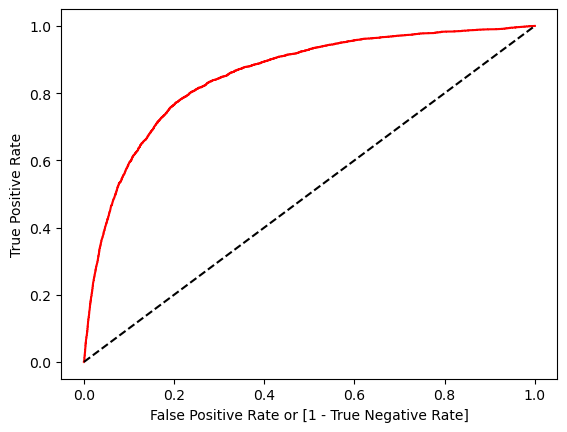

In [54]:
plt.plot(fpr,tpr,color='red',label='logit model(area=%0.2f)'%auc)
plt.plot([0, 1], [0, 1], 'k--')
plt.xlabel('False Positive Rate or [1 - True Negative Rate]')
plt.ylabel('True Positive Rate')

In [55]:
auc

0.594656261592241